# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
#imports
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy import stats


## #1 Is the distribution normal?


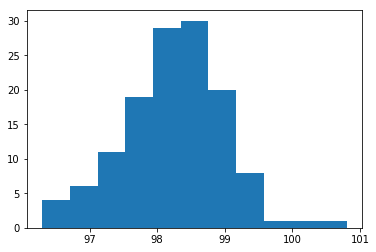

In [3]:
#check normailty with histogram
plt.hist(df.temperature, bins = int(np.sqrt(len(df.temperature))))
plt.show()

## #2 Is the sample size large? Are the observations independent?


In [4]:
# describe dataframe to see number of observations
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


## Check for independence

In [5]:
stats.chi2_contingency(df.temperature)

(0.0,
 1.0,
 0,
 array([  99.3,   98.4,   97.8,   99.2,   98. ,   99.2,   98. ,   98.8,
          98.4,   98.6,   98.8,   96.7,   98.2,   98.7,   97.8,   98.8,
          98.3,   98.2,   97.2,   99.4,   98.3,   98.2,   98.6,   98.4,
          97.8,   98. ,   97.8,   98.2,   98.4,   98.1,   98.3,   97.6,
          98.5,   98.6,   99.3,   99.5,   99.1,   98.3,   97.9,   96.4,
          98.4,   98.4,   96.9,   97.2,   99. ,   97.9,   97.4,   97.4,
          97.9,   97.1,   98.9,   98.3,   98.5,   98.6,   98.2,   98.6,
          98.8,   98.2,   98.2,   97.6,   99.1,   98.4,   98.2,   98.6,
          98.7,   97.4,   97.4,   98.6,   98.7,   98.9,   98.1,   97.7,
          98. ,   98.8,   99. ,   98.8,   98. ,   98.4,   97.4,   97.6,
          98.8,   98. ,   97.5,   99.2,   98.6,   97.1,   98.6,   98. ,
          98.7,   98.1,   97.8,  100. ,   98.8,   97.1,   97.8,   96.8,
          99.9,   98.7,   98.8,   98. ,   99. ,   98.5,   98. ,   99.4,
          97.6,   96.7,   97. ,   98.6,   98.7, 

According to the description of the data set we have 130 observations of body temperature which is large enough for the CLT to apply. The chi squared test for independence shows that the observations are independent

## #3 Is the true population mean really 98.6 degrees F?

I would use a 1 sample ttest because we are checking to see probability that the data fits the expected mean of 98.6 degrees



In [6]:
#check mean
print(np.mean(df.temperature))
#calculate t test statistic
t = ( np.mean(df.temperature)-98.6)/np.sqrt(np.var(df.temperature)/len(df.temperature))
print(t)
#check calculation
t = stats.ttest_1samp(df.temperature, 98.6) 
print(t)
#calculate z value
z = (98.6-np.mean(df.temperature))/(np.std(df.temperature))
print(z)



98.24923076923078
-5.47592520208
Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)
0.48027041116080765


This means that the alternatiuve hypothesis is true and the true mean is not 98.6 degrees. The z test shows that 98.6 is close to the sample mean and a likely body temperature but not the true mean body temperature as shown by the correct t-test


## #4 Draw a small sample of size 10 from the data and repeat both tests.



In [7]:
#Draw a small sample of size 10 from the data and repeat both tests.
sampTemp = random.sample(list(df.temperature),10)
print(np.mean(sampTemp))
t = ( np.mean(sampTemp)-98.6)/np.sqrt(np.var(sampTemp)/len(sampTemp))
print(t)

z = np.abs((98.6-np.mean(sampTemp))/(np.std(sampTemp)))
print(z)
# both the z test are within one standard deviation but do not show the significance like the t test does

98.44
-0.862161074818
0.272639270636


Which one is the correct one to use?
* I would use a 1 sample ttest again because it tells us whether the mean is the same as 98.6

What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?
* The z value changed a lot but the t value never nears 0 showing that how unlikely the mean body temperature of humans is 98.6 degrees

## #5 At what temperature should we consider someone's temperature to be "abnormal" 

In [8]:
# margin of error
moe = z*np.std(df.temperature)/np.sqrt(len(df.temperature))

print(moe)
# confidence interval
np.percentile(df.temperature,[2.5,97.5])

0.0174643487099


array([ 96.7225,  99.4775])

A person's body temperature is abnormal if it is below 96.6 or greater than 99.7
##  #6 Is there a significant difference between males and females in normal temperature?

In [9]:
# seperate data to male and female sets
male = df.loc[df.gender == 'M']
female = df.loc[df.gender == 'F']
# check new datasets
print(male.head())
print(female.head())
print(np.mean(male.temperature))
print(np.mean(female.temperature))
#preform 2 sample ttest
t = stats.ttest_ind(male.temperature, female.temperature)
print(t)
 

    temperature gender  heart_rate
2          97.8      M        73.0
5          99.2      M        83.0
6          98.0      M        71.0
7          98.8      M        78.0
12         98.2      M        72.0
   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
3         99.2      F        66.0
4         98.0      F        73.0
8         98.4      F        84.0
98.1046153846154
98.39384615384613
Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)


What test did you use and why?
* I used a 2 sample ttest to compare the male and female cohorts. A ttest will allow to test the null hypothesis that males and females have the same mean body temperature

Write a story with your conclusion in the context of the original problem.
* The ttest shows that we can reject the null hypothesis that the mean body temps of males and females are the same. This means male and females have a different mean body temperature. Perhaps females have a mean body temperature of 98.6 degrees since in our test females had a higher mean body temperature